# Housing values by year
By [Brian C. Keegan](https://www.brianckeegan.com), Ph.D.  
March 2023  
[MIT License](https://opensource.org/license/mit/)  

## Load libraries

In [1]:
import numpy as np
import pandas as pd

pd.options.display.max_columns = 100

import requests, json

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sb

## Load data

In [2]:
values_df = pd.read_csv('https://assessor.boco.solutions/ASR_PublicDataFiles/Values.csv')
values_df.head()

,strap,tax_yr,bldAcutalVal,LandAcutalVal,xfActualVal,totalActualVal,landAssessedVal,bldAssessedVal,xfAssessedVal,totalAssessedVal,status_cd
0,M2000001,2022,82400,0,NaN,82400,NaN,5727.0,NaN,5727.0,A
1,M2000002,2022,49900,0,NaN,49900,NaN,3468.0,NaN,3468.0,A
2,M2000003,2022,34900,0,NaN,34900,NaN,2426.0,NaN,2426.0,A
3,M2000004,2022,59400,0,NaN,59400,NaN,4128.0,NaN,4128.0,A
4,M2000007,2022,62700,0,NaN,62700,NaN,4358.0,NaN,4358.0,A


In [3]:
# This is a ~46MB file, it may take a few seconds
owner_df = pd.read_csv('https://assessor.boco.solutions/ASR_PublicDataFiles/Owner_Address.csv',low_memory=False)
owner_df.head()

,CreatedDate,strap,folio,status_cd,bld_num,str_num,str_pfx,str,str_sfx,str_unit,city,sub_code,sub_dscr,section,township,range,block,lot,owner_name,mail_to,mailingAddr1,mailingAddr2,mailingCity,mailingState,mailingZip,mailingCountry,role_cd,pct_own,taxArea,nh,mill_levy,legalDscr,waterFee,account_type
0,3/28/2023 4:00:48 AM,M2000001,146318113001,A,0.0,4500.0,NaN,19TH,ST,119,BOULDER,1841.0,COUNTRYSIDE VILLAGE BOULDER - MHP BOV,18.0,1N,70.0,,,BRETADO-SEGOVIA NORATO SERGIO,NaN,4500 19TH ST 119,NaN,BOULDER,CO,80304,NaN,P,1.0,10,122.0,92.864,119 COUNTRYSIDE VILLAGE BO MHP 99 LEX 60X28 2T...,NaN,MANUFACTURED HOME
1,3/28/2023 4:00:48 AM,M2000002,146318113001,A,0.0,4500.0,NaN,19TH,ST,113,BOULDER,1841.0,COUNTRYSIDE VILLAGE BOULDER - MHP BOV,18.0,1N,70.0,,,LASTIRI BENJAMIN,NaN,4500 19TH ST 113,NaN,BOULDER,CO,80304,NaN,P,1.0,10,122.0,92.864,113 COUNTRYSIDE VILLAGE BO MHP 98 PRE 76X16 GD...,NaN,MANUFACTURED HOME
2,3/28/2023 4:00:48 AM,M2000003,146321300001,A,0.0,5000.0,NaN,BUTTE,ST,185,BOULDER,8464.0,VISTA VILLAGE - MHP BOV,21.0,1N,70.0,,,KRAUSE CLARINDA L,NaN,5000 BUTTE ST 185,NaN,BOULDER,CO,80301,NaN,P,1.0,10,135.0,92.864,185 VISTA VILLAGE MHP 99 CHA 58X16 4990 229934...,NaN,MANUFACTURED HOME
3,3/28/2023 4:00:48 AM,M2000004,146318113001,A,0.0,4500.0,NaN,19TH,ST,257,BOULDER,1841.0,COUNTRYSIDE VILLAGE BOULDER - MHP BOV,18.0,1N,70.0,,,COUNTRYSIDE VILLAGE ASSOCS/BOULDER LTD PARTNER...,C/O UNIPROP INC,280 DAINES ST SUITE 300,NaN,BIRMINGHAM,MI,48009-6250,NaN,P,1.0,10,122.0,92.864,257 COUNTRYSIDE VILLAGE BO MHP 99 SKYLINE 44X2...,NaN,MANUFACTURED HOME
4,3/28/2023 4:00:48 AM,M2000007,146318113001,A,0.0,4500.0,NaN,19TH,ST,214,BOULDER,1841.0,COUNTRYSIDE VILLAGE BOULDER - MHP BOV,18.0,1N,70.0,,,LOPEZ ABRAHAM & ISABEL ARGUMEDO,NaN,4500 19TH ST 214,NaN,BOULDER,CO,80304,NaN,P,1.0,10,122.0,92.864,214 COUNTRYSIDE VILLAGE BO MHP AKA BOULDER MEA...,NaN,MANUFACTURED HOME


In [4]:
# This is a ~51MB file, it may take a few seconds
building_df = pd.read_csv('https://assessor.boco.solutions/ASR_PublicDataFiles/Buildings.csv',low_memory=False)
building_df.head()

,strap,bld_num,section_num,designCode,designCodeDscr,qualityCode,qualityCodeDscr,bldgClass,bldgClassDscr,ConstCode,ConstCodeDscr,builtYear,CompCode,EffectiveYear,bsmtSF,bsmtType,bsmtTypeDscr,carStorageSF,carStorageType,carStorageTypeDscr,nbrBedRoom,nbrRoomsNobath,mainfloorSF,nbrThreeQtrBaths,nbrFullBaths,nbrHalfBaths,TotalFinishedSF,Ac,AcDscr,Heating,HeatingDscr,ExtWallPrim,ExtWallDscrPrim,ExtWallSec,ExtWallDscrSec,IntWall,IntWallDscr,Roof_Cover,Roof_CoverDscr,Stories,UnitCount,status_cd
0,M2000001,1,1,0320,DOUBLE WIDE,30,AVERAGE,1235,MANUFACTURED HOUSING IMPROVEMENTS,0,NaN,1999,1.0,1999,0,0,0,560,GRC,CARPORT AREA,0.0,0.0,1680,0.0,0.0,0.0,1680,210.0,Whole House,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
1,M2000002,1,1,0310,SINGLE WIDE,30,AVERAGE,1235,MANUFACTURED HOUSING IMPROVEMENTS,0,NaN,1998,1.0,1998,0,0,0,0,0,0,0.0,0.0,1216,0.0,0.0,0.0,1216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
2,M2000003,1,1,0310,SINGLE WIDE,30,AVERAGE,1235,MANUFACTURED HOUSING IMPROVEMENTS,0,NaN,1999,1.0,1999,0,0,0,0,0,0,0.0,0.0,928,0.0,0.0,0.0,928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
3,M2000004,1,1,0320,DOUBLE WIDE,30,AVERAGE,1235,MANUFACTURED HOUSING IMPROVEMENTS,0,NaN,1998,1.0,1998,0,0,0,0,0,0,0.0,0.0,1232,0.0,0.0,0.0,1232,210.0,Whole House,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
4,M2000007,1,1,0320,DOUBLE WIDE,30,AVERAGE,1235,MANUFACTURED HOUSING IMPROVEMENTS,0,NaN,2000,1.0,2000,0,0,0,0,0,0,0.0,0.0,1248,0.0,0.0,0.0,1248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A


## Filter data

In [5]:
owner_df['account_type'].value_counts()

RESIDENTIAL                 97677
RESIDENTIAL CONDO           15612
EXEMPT                       6474
VACANT LAND                  6249
MANUFACTURED HOME            3987
COMMERCIAL                   3768
RESIDENT LAND                3010
AGRICULTURAL                 2014
APARTMENT                    1512
MINERALS                     1167
AFFORDABLE RES               1043
INDUSTRIAL                    984
MIXED USE                     522
POSS INTEREST                 334
IMP ONLY                      264
HANGAR                        236
STATE ASSESSED                195
AG WITH NON-INTEGRAL RES      163
PART EXEMPT                    87
AG_MIXED                       69
MINOR STRUCT/VL                52
NATURAL RESRC                  10
BED & BREAK                     7
Name: account_type, dtype: int64

In [6]:
# Filter to only residential account types
c0 = owner_df['account_type'].isin(['RESIDENTIAL','RESIDENTIAL CONDO','APARTMENT','AFFORDABLE RES'])

# Filter to only City of Boulder
c1 = owner_df['city'] == 'BOULDER'

# Get unique strap IDs satisfying both filters
res_straps = owner_df.loc[c0 & c1,'strap'].unique()

In [15]:
# Filter buildings to only Boulder residence straps
mean_building_df = building_df.loc[building_df['strap'].isin(res_straps)]

# Groupby-aggregate buildings by strap
# Because one strap can have multiple buildings, add all square footage together
# Average of all builtYear together
agg_d = {'TotalFinishedSF':'sum','builtYear':'mean','strap':len}
agg_building_df = mean_building_df.groupby('strap').agg(agg_d)
agg_building_df.columns = ['sqft','year','buildings']

# Left join the building aggregated DataFrame with values
agg_building_df = pd.merge(
    left = agg_building_df,
    right = values_df.loc[values_df['strap'].isin(res_straps),['strap','totalActualVal']],
    left_index = True,
    right_on = 'strap',
    how = 'left'
)

# Compute value per square foot
agg_building_df['val_per_sqft'] = agg_building_df['totalActualVal'] / agg_building_df['sqft']

# Replace div-by-0 with NaN
agg_building_df.replace({'val_per_sqft':{np.inf:np.nan}},inplace=True)

# Extract the decade and cast to integers
# agg_building_df['decade'] = agg_building_df['builtYear'].round(-1).apply(int)
agg_building_df['decade'] = (agg_building_df['year'].astype(str).str.slice(0,3) + '0').astype(int)

# Filter to buildings since 1900
agg_building_df = agg_building_df[(agg_building_df['decade'] >= 1900) & (agg_building_df['decade'] < 2020)]

agg_building_df.head()

,sqft,year,buildings,strap,totalActualVal,val_per_sqft,decade
3557.0,1381,1900.0,1,R0000002,887900.0,642.939899,1900
3558.0,1473,1900.0,1,R0000003,807800.0,548.404616,1900
3559.0,1282,1957.0,1,R0000005,731400.0,570.514821,1950
3560.0,2466,1962.0,2,R0000006,1078500.0,437.347932,1960
3561.0,6816,1961.5,4,R0000007,1607880.0,235.897887,1960


## Visualize

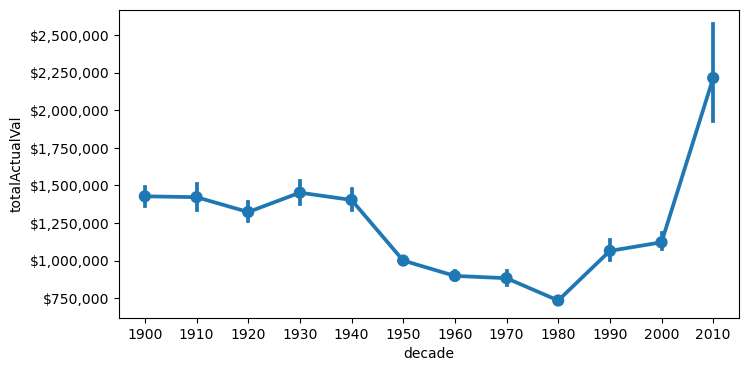

In [8]:
f,ax = plt.subplots(figsize=(8,4))

# Plot distributions by year
sb.pointplot(data = agg_building_df, x='decade', y='totalActualVal', ax=ax)

# Make a nice-looking y-axis tick labels
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))


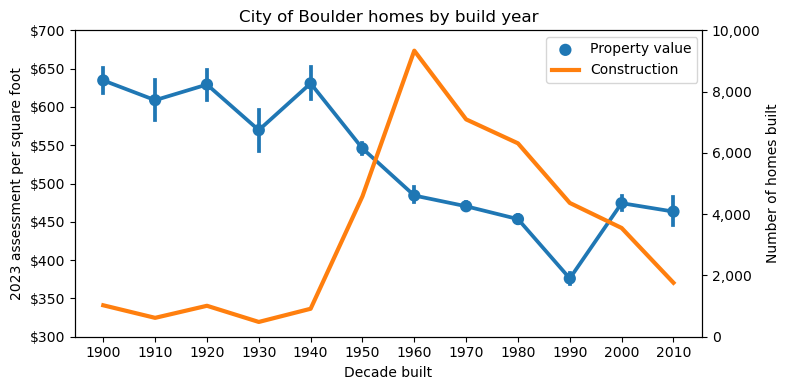

In [23]:
f,ax = plt.subplots(figsize=(8,4))

# Plot distributions by year
sb.pointplot(data = agg_building_df, x='decade', y='val_per_sqft', ax=ax, label='Property value')

# Make a nice-looking y-axis tick labels
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

# Scale and label
ax.set_ylim((300,700))
ax.set_ylabel('2023 assessment per square foot')
ax.set_xlabel('Decade built')
ax.set_title('City of Boulder homes by build year')

# Set up secondary y-axis for construction
ax2 = ax.twinx()

# Group building data decade and aggregate by number of buildings on the strap
_s = agg_building_df.groupby('decade').agg({'buildings':'sum'})['buildings'].reset_index(drop=True)

# Plot building construction by year
_s.plot(ax=ax2,lw=3,color='tab:orange',label='Construction')
ax2.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
ax2.set_ylim((0,10000))
ax2.set_ylabel('Number of homes built')

f.legend(loc='upper left',bbox_to_anchor=(.68,.9125))

f.tight_layout()
f.savefig('assessed_value_per_sqft_by_year.png',bbox_inches='tight')

In [10]:
_s0 = agg_building_df.groupby('decade').agg({'val_per_sqft':'median'})
_s0.index = _s0.index.astype(int)
_s1 = agg_building_df.groupby('decade').agg({'strap':'nunique'})['strap']
_s1.index = _s1.index.astype(int)
_df = pd.concat([_s0,_s1],axis=1)
_df.corr()

,val_per_sqft,strap
val_per_sqft,1.00000,-0.69104
strap,-0.69104,1.00000


## Non-Boulder cities in Boulder County

In [11]:
# Filter to only residential account types
c0 = owner_df['account_type'].isin(['RESIDENTIAL','RESIDENTIAL CONDO','APARTMENT','AFFORDABLE RES'])

# Filter to only City of Boulder
c2 = owner_df['city'] != 'BOULDER'

# Get unique strap IDs satisfying both filters
non_boulder_res_straps = owner_df.loc[c0 & c2,'strap'].unique()

In [24]:
# Filter buildings to only Boulder residence straps
mean_building_df = building_df.loc[building_df['strap'].isin(non_boulder_res_straps)]

# Groupby-aggregate buildings by strap
# Because one strap can have multiple buildings, add all square footage together
# Average of all builtYear together
agg_d = {'TotalFinishedSF':'sum','builtYear':'mean','strap':len}
agg_building_df = mean_building_df.groupby('strap').agg(agg_d)
agg_building_df.columns = ['sqft','year','buildings']

# Left join the building aggregated DataFrame with values
agg_building_df = pd.merge(
    left = agg_building_df,
    right = values_df.loc[values_df['strap'].isin(non_boulder_res_straps),['strap','totalActualVal']],
    left_index = True,
    right_on = 'strap',
    how = 'left'
)

# Compute value per square foot
agg_building_df['val_per_sqft'] = agg_building_df['totalActualVal'] / agg_building_df['sqft']

# Replace div-by-0 with NaN
agg_building_df.replace({'val_per_sqft':{np.inf:np.nan}},inplace=True)

# Extract the decade and cast to integers
# agg_building_df['decade'] = agg_building_df['builtYear'].round(-1).apply(int)
agg_building_df['decade'] = (agg_building_df['year'].astype(str).str.slice(0,3) + '0').astype(int)

# Filter to buildings since 1900
agg_building_df = agg_building_df[(agg_building_df['decade'] >= 1900) & (agg_building_df['decade'] < 2020)]

agg_building_df.head()

,sqft,year,buildings,strap,totalActualVal,val_per_sqft,decade
17921.0,2700,1910.0,2,R0019141,737900.0,273.296296,1910
17922.0,2496,1962.0,2,R0019143,616600.0,247.035256,1960
17923.0,1064,1985.5,2,R0019144,642100.0,603.477444,1980
17924.0,2412,1949.0,2,R0019145,551200.0,228.524046,1940
17925.0,1038,2017.0,1,R0019146,585300.0,563.872832,2010


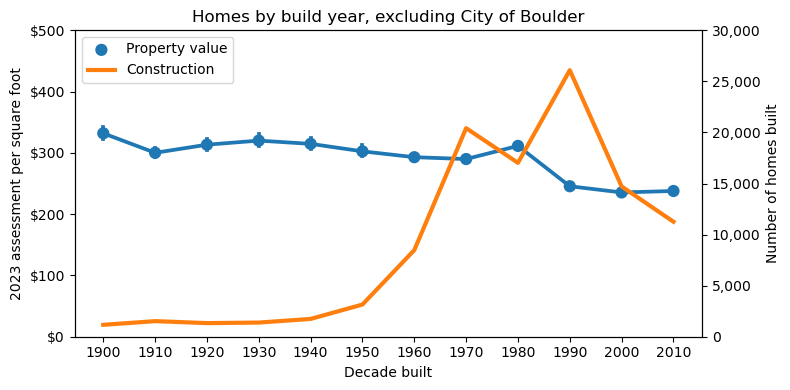

In [32]:
f,ax = plt.subplots(figsize=(8,4))

# Plot distributions by year
sb.pointplot(data = agg_building_df, x='decade', y='val_per_sqft', ax=ax, label='Property value')

# Make a nice-looking y-axis tick labels
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

# Scale and label
ax.set_ylim((0,500))
ax.set_ylabel('2023 assessment per square foot')
ax.set_xlabel('Decade built')
ax.set_title('Homes by build year, excluding City of Boulder')

# Set up secondary y-axis for construction
ax2 = ax.twinx()

# Group building data decade and aggregate by number of buildings on the strap
_s = agg_building_df.groupby('decade').agg({'buildings':'sum'})['buildings'].reset_index(drop=True)

# Plot building construction by year
_s.plot(ax=ax2,lw=3,color='tab:orange',label='Construction')
ax2.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
ax2.set_ylim((0,30000))
ax2.set_ylabel('Number of homes built')

f.legend(loc='upper left',bbox_to_anchor=(.1,.9125))

f.tight_layout()
f.savefig('assessed_value_per_sqft_by_year.png',bbox_inches='tight')